In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
# Load dataset
data = pd.read_csv("unclean_pet_data.csv")

In [3]:
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
  PetType    Breed  AgeMonths    Size   WeightKg  TimeInShelterDays  \
0  Rabbit   Rabbit      116.0  Medium  29.186575               71.0   
1     Cat  Siamese      165.0  Medium  25.265161               52.0   
2     Cat  Siamese        NaN   Small        NaN                NaN   
3  Rabbit   Rabbit       31.0   Large   6.641891               52.0   
4  Rabbit   Rabbit      125.0   Large  13.845579               39.0   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             561 non-null    object 
 1   Breed               561 non-null    object 
 2   AgeMonths           505 non-null    float64
 3   Size                561 non-null    object

In [4]:
# Handle missing values
categorical_cols = ['PetType', 'Breed', 'Size'] 
numerical_cols = ['AgeMonths', 'WeightKg', 'TimeInShelterDays'] 

In [5]:
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

In [6]:
# Impute categorical columns
for col in categorical_cols:
    data[col] = data[col].fillna("Unknown")

# Encode categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])



Feature Correlations:


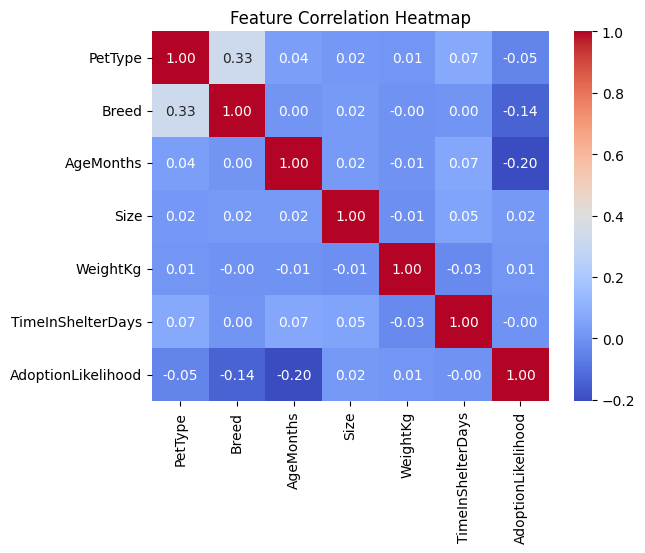

In [7]:
# Display correlations and distributions
print("\nFeature Correlations:")
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
X = data[['PetType', 'Breed', 'Size', 'AgeMonths', 'WeightKg', 'TimeInShelterDays']]
y = data['AdoptionLikelihood'] 

In [10]:
# Standardize numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

C:\Users\prana\AppData\Local\Temp\ipykernel_2380\36610255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Preprocess features for MultinomialNB
minmax_scaler = MinMaxScaler()
X_train_mnb = minmax_scaler.fit_transform(X_train)
X_test_mnb = minmax_scaler.transform(X_test)


In [15]:
# Train Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)

# Predict on test data
y_pred_mnb = mnb.predict(X_test_mnb)

# Evaluate performance
print("\nMultinomial Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))



Multinomial Naive Bayes Classifier:
Accuracy: 0.6637168141592921
Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80        75
           1       0.00      0.00      0.00        38

    accuracy                           0.66       113
   macro avg       0.33      0.50      0.40       113
weighted avg       0.44      0.66      0.53       113



C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati


Gaussian Naive Bayes Classifier:
Accuracy: 0.7610619469026548
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85        75
           1       0.92      0.32      0.47        38

    accuracy                           0.76       113
   macro avg       0.83      0.65      0.66       113
weighted avg       0.80      0.76      0.72       113


Cross-Validation Accuracy for Gaussian Naive Bayes: 0.7415


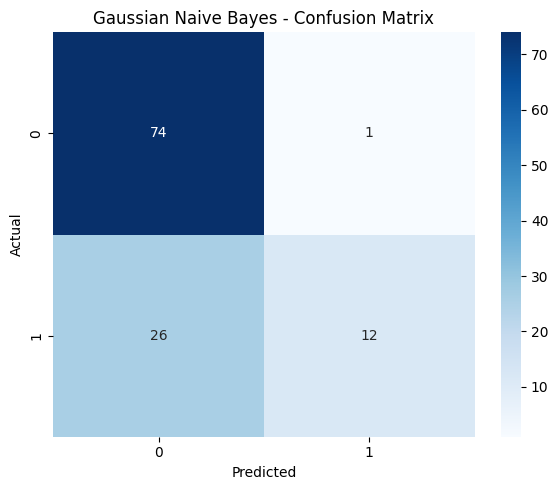

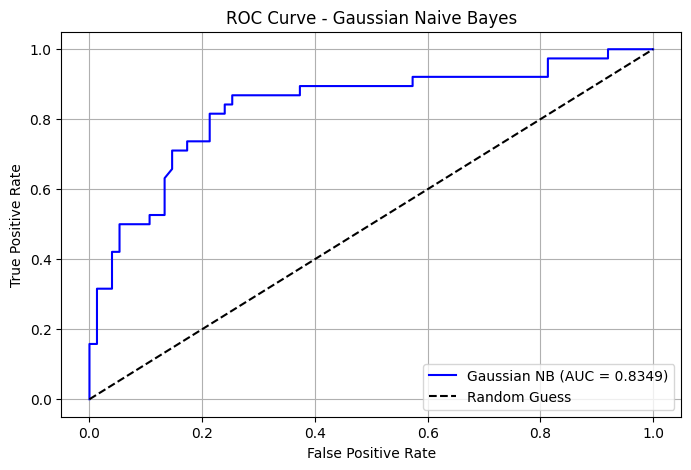


Interpretation:
Gaussian Naive Bayes achieved a cross-validation accuracy of 0.7415
AUC Score: 0.8349


In [17]:
# Gaussian Naive Bayes Evaluation
print("\nGaussian Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Cross-Validation for Gaussian Naive Bayes
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_gnb = cross_val_score(gnb, X, y, cv=kf, scoring='accuracy')
print("\nCross-Validation Accuracy for Gaussian Naive Bayes: {:.4f}".format(np.mean(cv_scores_gnb)))

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gnb, annot=True, cmap="Blues", fmt='d')
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve and AUC for Gaussian Naive Bayes
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
auc_gnb = roc_auc_score(y_test, y_prob_gnb)

plt.figure(figsize=(8, 5))
plt.plot(fpr_gnb, tpr_gnb, label=f"Gaussian NB (AUC = {auc_gnb:.4f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Interpretation
print("\nInterpretation:")
print(f"Gaussian Naive Bayes achieved a cross-validation accuracy of {np.mean(cv_scores_gnb):.4f}")
print(f"AUC Score: {auc_gnb:.4f}")